This project marks my first endeavor into time series analysis. I will be exploring a dataset on electric production, obtained from Kaggle, which offers a collection of historical records over a specific time period. Through this project, I aim to gain practical experience in applying time series analysis techniques to uncover patterns, trends, and seasonality within the data. By delving into this dataset, I hope to enhance my understanding of time series analysis concepts and contribute to the field by potentially improving forecasting models and facilitating informed decision-making for efficient resource allocation.

Zain Ali

In [ ]:
import zipfile

# Unzip data

zip_ref = zipfile.ZipFile("/content/archive (4).zip", "r")
zip_ref.extractall()
zip_ref.close()

In [59]:
import pandas as pd

# Read in the data

elec = pd.read_csv("/content/Electric_Production.csv")
elec.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [60]:
elec["DATE"]

0       1/1/1985
1       2/1/1985
2       3/1/1985
3       4/1/1985
4       5/1/1985
         ...    
392     9/1/2017
393    10/1/2017
394    11/1/2017
395    12/1/2017
396     1/1/2018
Name: DATE, Length: 397, dtype: object

In [61]:
elec["DATE"] = pd.to_datetime(elec["DATE"])
elec.set_index("DATE", inplace =True)

<Axes: xlabel='DATE'>

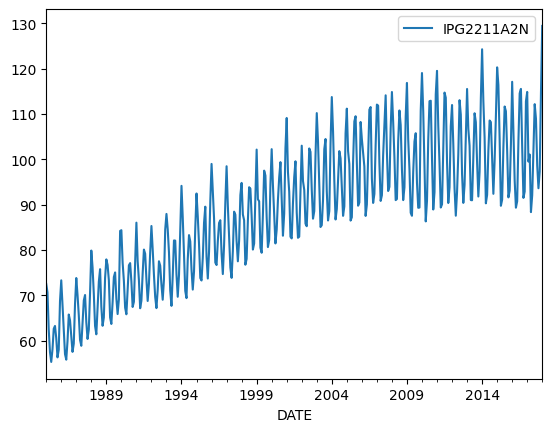

In [62]:
import matplotlib.pyplot as plt

# View the data

elec.plot()

In [63]:
elec.columns

Index(['IPG2211A2N'], dtype='object')

### Create Data

In [64]:
# Split data into training and test split

train_size = 0.8 * len(elec)
train_size = int(train_size)

train_set = elec.index[:train_size]
train_label = elec["IPG2211A2N"][:train_size]
test_set = elec.index[train_size:]
test_label = elec["IPG2211A2N"][train_size:]


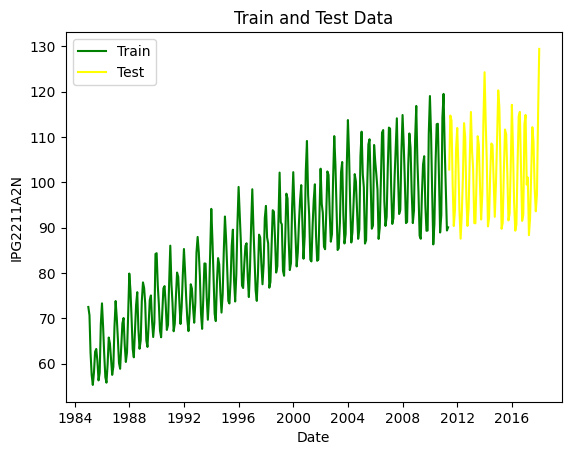

In [65]:
import matplotlib.pyplot as plt

# Plotting the train and test sets
plt.plot(train_set, train_label, color='green', label='Train')
plt.plot(test_set, test_label, color='yellow', label='Test')

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('IPG2211A2N')
plt.title('Train and Test Data')
plt.legend()

### Create Windows

In [66]:
# Create window and horizon function

def apply_window(data, window_size, horizon):
    windowed_data = []
    labels = []
    for i in range(len(data) - window_size - horizon + 1):
        window = data[i:i + window_size]
        target = data[i + window_size + horizon - 1]
        windowed_data.append(window)
        labels.append(target)
    return windowed_data, labels

In [67]:
# Get windowed data

windowed_data, label = apply_window(elec['IPG2211A2N'], 3, 1)

windowed_data[0], label[0]

(DATE
 1985-01-01    72.5052
 1985-02-01    70.6720
 1985-03-01    62.4502
 Name: IPG2211A2N, dtype: float64,
 57.4714)

In [68]:
# Calculate the index to split the data
split_index = int(len(windowed_data) * 0.9)

# Split the data into training and testing sets
train_data = windowed_data[:split_index]
train_labels = label[:split_index]
test_data = windowed_data[split_index:]
test_labels = label[split_index:]


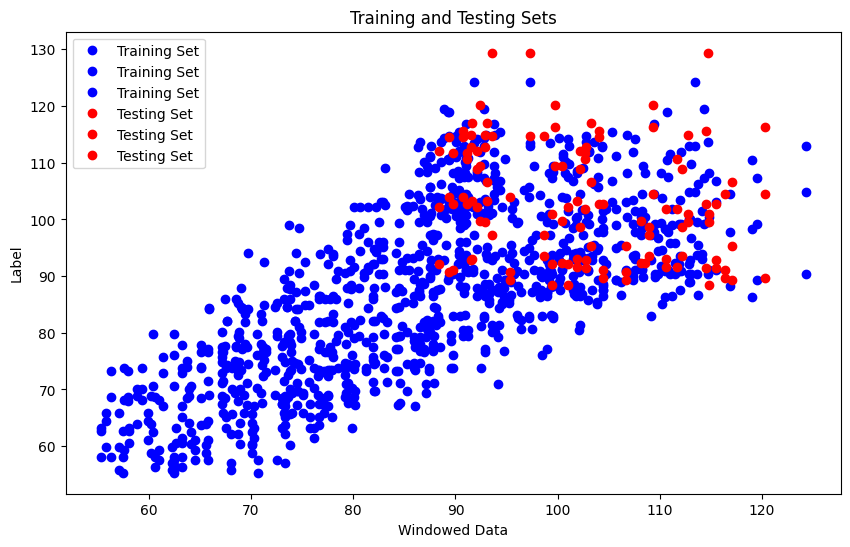

In [69]:
import matplotlib.pyplot as plt

# Graph training and testing sets on the same graph
plt.figure(figsize=(10, 6))
plt.plot(train_data, train_labels, 'bo', label='Training Set')
plt.plot(test_data, test_labels, 'ro', label='Testing Set')
plt.xlabel('Windowed Data')
plt.ylabel('Label')
plt.title('Training and Testing Sets')
plt.legend()

In [ ]:
train_data, train_label, test_label, test_data

### First Model





In [71]:
import tensorflow as tf

# Build the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(1, activation="linear")  # linear activation is the same as having no activation
])

# Compile model
model_1.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

import numpy as np

# Convert data to numpy arrays
train_data_np = np.array(train_data)
train_labels_np = np.array(train_labels)
test_data_np = np.array(test_data)
test_labels_np = np.array(test_labels)

# Fit model
history_1 = model_1.fit(x=train_data_np,
            y=train_labels_np,
            epochs=100,
            validation_data=(test_data_np, test_labels_np))


Epoch 1/100
12/12 [==============================] - 1s 19ms/step - loss: 58.4076 - mae: 58.4076 - val_loss: 47.2603 - val_mae: 47.2603
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 26.4643 - mae: 26.4643 - val_loss: 12.9225 - val_mae: 12.9225
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 9.6984 - mae: 9.6984 - val_loss: 14.1878 - val_mae: 14.1878
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 10.5979 - mae: 10.5979 - val_loss: 12.2450 - val_mae: 12.2450
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 8.9739 - mae: 8.9739 - val_loss: 11.7824 - val_mae: 11.7824
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 8.7633 - mae: 8.7633 - val_loss: 11.6578 - val_mae: 11.6578
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 8.6132 - mae: 8.6132 - val_loss: 11.6012 - val_mae: 11.6012
Epoch 8/100
12/12 [==============================] - 0s 7ms/st

The model's performance improved gradually throughout the training process, as indicated by the decreasing loss and MAE values. This suggests that the model learned to better predict the target variable over time.

After 100 epochs of training, the final validation loss was 6.1227 and the final validation MAE was 6.1227.

### Model 2 bigger window



*   Added an additional dense layer with 64 neurons after the first layer to increase model complexity and capacity.

*   Increased the number of epochs to 200 to allow the model to train for a longer period and potentially converge to a better solution.


*   Adjusted the batch size to 32 to balance memory constraints and stable gradient estimation during training.

*   Made window size 7 and horizon is still 1





In [72]:
# Get windowed data
windowed_data, label = apply_window(elec['IPG2211A2N'], 7, 1)

windowed_data[0], label[0]

(DATE
 1985-01-01    72.5052
 1985-02-01    70.6720
 1985-03-01    62.4502
 1985-04-01    57.4714
 1985-05-01    55.3151
 1985-06-01    58.0904
 1985-07-01    62.6202
 Name: IPG2211A2N, dtype: float64,
 63.2485)

In [73]:
# Calculate the index to split the data
split_index = int(len(windowed_data) * 0.9)

# Split the data into training and testing sets
train_data = windowed_data[:split_index]
train_labels = label[:split_index]
test_data = windowed_data[split_index:]
test_labels = label[split_index:]

# Convert data to numpy arrays
train_data_np = np.array(train_data)
train_labels_np = np.array(train_labels)
test_data_np = np.array(test_data)
test_labels_np = np.array(test_labels)

In [74]:

# Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
history_2 = model_2.fit(x=train_data_np,
            y=train_labels_np,
            epochs=200,  # Increase the number of epochs
            batch_size=32,  # Adjust the batch size
            validation_data=(test_data_np, test_labels_np))



Epoch 1/200
11/11 [==============================] - 1s 20ms/step - loss: 61.0467 - mae: 61.0467 - val_loss: 12.9211 - val_mae: 12.9211
Epoch 2/200
11/11 [==============================] - 0s 8ms/step - loss: 15.8704 - mae: 15.8704 - val_loss: 11.7849 - val_mae: 11.7849
Epoch 3/200
11/11 [==============================] - 0s 7ms/step - loss: 9.3706 - mae: 9.3706 - val_loss: 10.6946 - val_mae: 10.6946
Epoch 4/200
11/11 [==============================] - 0s 8ms/step - loss: 7.7045 - mae: 7.7045 - val_loss: 9.4301 - val_mae: 9.4301
Epoch 5/200
11/11 [==============================] - 0s 6ms/step - loss: 6.6538 - mae: 6.6538 - val_loss: 8.6354 - val_mae: 8.6354
Epoch 6/200
11/11 [==============================] - 0s 8ms/step - loss: 5.8366 - mae: 5.8366 - val_loss: 7.6086 - val_mae: 7.6086
Epoch 7/200
11/11 [==============================] - 0s 8ms/step - loss: 5.2461 - mae: 5.2461 - val_loss: 6.8898 - val_mae: 6.8898
Epoch 8/200
11/11 [==============================] - 0s 8ms/step - loss:


Model trained for 100 epochs:

Training loss: 4.4319
Training mean absolute error (MAE): 4.4319
Validation loss: 6.1227
Validation MAE: 6.1227

Model trained for 200 epochs:

Training loss: 2.3588
Training MAE: 2.3588
Validation loss: 3.6890
Validation MAE: 3.6890

Based on these metrics, we can observe that the model trained for 200 epochs achieved lower losses and MAE values compared to the model trained for 100 epochs. This indicates that the model trained for 200 epochs may have better performance and generalization capabilities.

### RNN MODEL

In [80]:
import tensorflow as tf



# Define the model architecture
model_3 = tf.keras.models.Sequential()
model_3.add(tf.keras.layers.LSTM(64, input_shape=(7, 1)))  # Adjust the LSTM parameters as needed
model_3.add(tf.keras.layers.Dense(1))  # Adjust the output layer as needed

# Compile the model
model_3.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Fit the model
history_3 = model_3.fit(x=train_data_np,
            y=train_labels_np,
            epochs=300,
            batch_size=32,
            validation_data=(test_data_np, test_labels_np))



Epoch 1/300
11/11 [==============================] - 3s 54ms/step - loss: 7867.0625 - mae: 87.4730 - val_loss: 10640.4766 - val_mae: 102.6526
Epoch 2/300
11/11 [==============================] - 0s 8ms/step - loss: 7745.5620 - mae: 86.7703 - val_loss: 10518.5928 - val_mae: 102.0563
Epoch 3/300
11/11 [==============================] - 0s 7ms/step - loss: 7625.0864 - mae: 86.0583 - val_loss: 10370.4453 - val_mae: 101.3272
Epoch 4/300
11/11 [==============================] - 0s 8ms/step - loss: 7464.1831 - mae: 85.1122 - val_loss: 10147.0400 - val_mae: 100.2188
Epoch 5/300
11/11 [==============================] - 0s 10ms/step - loss: 7245.8867 - mae: 83.8150 - val_loss: 9882.9639 - val_mae: 98.8912
Epoch 6/300
11/11 [==============================] - 0s 9ms/step - loss: 7005.0200 - mae: 82.3624 - val_loss: 9585.7256 - val_mae: 97.3767
Epoch 7/300
11/11 [==============================] - 0s 9ms/step - loss: 6755.5967 - mae: 80.8192 - val_loss: 9268.4111 - val_mae: 95.7305
Epoch 8/300
11/11

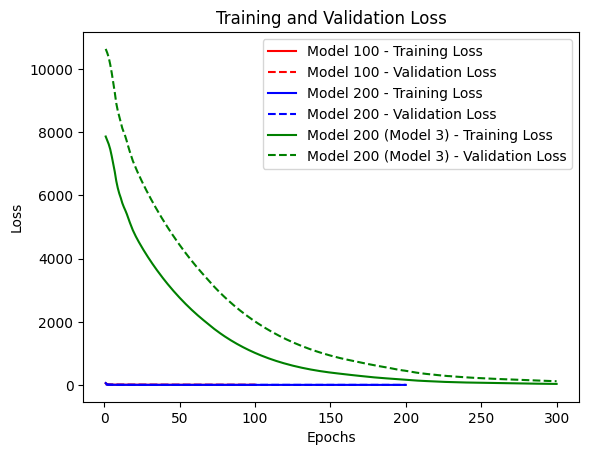

In [82]:
# Trained for 100 epochs
epochs_100 = range(1, 101)
train_loss_100 = model_1.history.history['loss']
val_loss_100 = model_1.history.history['val_loss']

# Trained for 200 epochs
epochs_200 = range(1, 201)
train_loss_200 = model_2.history.history['loss']
val_loss_200 = model_2.history.history['val_loss']

# Trained for 300 epochs (Model 3)
epochs_200_model_3 = range(1, 301)
train_loss_200_model_3 = model_3.history.history['loss']
val_loss_200_model_3 = model_3.history.history['val_loss']

# Plotting the training and validation loss curves
plt.plot(epochs_100, train_loss_100, 'r', label='Model 100 - Training Loss')
plt.plot(epochs_100, val_loss_100, 'r--', label='Model 100 - Validation Loss')
plt.plot(epochs_200, train_loss_200, 'b', label='Model 200 - Training Loss')
plt.plot(epochs_200, val_loss_200, 'b--', label='Model 200 - Validation Loss')
plt.plot(epochs_200_model_3, train_loss_200_model_3, 'g', label='Model 200 (Model 3) - Training Loss')
plt.plot(epochs_200_model_3, val_loss_200_model_3, 'g--', label='Model 200 (Model 3) - Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


All three graphs reach a similar convergence point, indicating that they all eventually reach a point of stability. However, the speed at which they converge varies among the models. Model 3 takes longer to converge compared to Model 2 and Model 1. This can be observed by the slower decline of the loss curve for Model 3, suggesting that it requires more epochs to reach a similar level of stability as the other models.